In [1]:
### importing packages ###
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from datetime import datetime, date, time

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure
from pylab import rcParams
import joblib

In [3]:
%%time
from sklearn.linear_model import LogisticRegression

Wall time: 1.8 s


#### importing pickled file

In [4]:
#### import the pickled X_train_fe dataset ####
X_train_fe = joblib.load("X_train_fe.pkl")
X_train_fe.shape

(381109, 39)

In [5]:
#### dropping few variables ####
X_train_fs = X_train_fe.drop(labels = ['gender', 'region_cd', 'vehicle_age', 'vehicle_damage', 'annual_premium', 'policy_sales_channel', 'age_bins'], axis = 1)
print(X_train_fs.shape)

(381109, 32)


### Feature Selection

#### Filter Methods

#### 1. Quasi-Constant

In [6]:
#### Identifying quasi-constant variables, values less than 1% ###
vars = ['driving_licence', 'previously_insured', 'gender_le', 'vehicle_damage_le', 'f_licence_premium_m', 'f_premium_more_10k']
for var in vars :
    print("Feature Name: ", var)
    print(X_train_fs[var].value_counts()/X_train_fs.shape[0] * 100)

Feature Name:  driving_licence
1    99.786938
0     0.213062
Name: driving_licence, dtype: float64
Feature Name:  previously_insured
0    54.178988
1    45.821012
Name: previously_insured, dtype: float64
Feature Name:  gender_le
1    54.07613
0    45.92387
Name: gender_le, dtype: float64
Feature Name:  vehicle_damage_le
1    50.487656
0    49.512344
Name: vehicle_damage_le, dtype: float64
Feature Name:  f_licence_premium_m
34560.223201    99.786938
38607.916132     0.213062
Name: f_licence_premium_m, dtype: float64
Feature Name:  f_premium_more_10k
1    99.833119
0     0.166881
Name: f_premium_more_10k, dtype: float64


#### Observations: Quasi-Constant Features:
    1. driving_licence
    2. f_licence_premium_m
    3. f_premium_more_10k

In [7]:
#### dropping quasi-constant features ####
X_train_fs = X_train_fs.drop(labels = ['driving_licence', 'f_licence_premium_m', 'f_premium_more_10k'], axis = 1)
X_train_fs.shape

(381109, 29)

In [8]:
#### contineous variables #### 
contineous_vars = ['age', 'vintage', 'annual_premium_o', 'f_region_cd_cnt', 'f_vintage_cnt', 'f_age_dist_cnt', 'f_reg_cha_premium_std', 'f_insure_region_premium_m', 'f_channel_cnt', 'response']
print("contineous_vars :", len(contineous_vars))

contineous_vars : 10


#### 2. Correlation

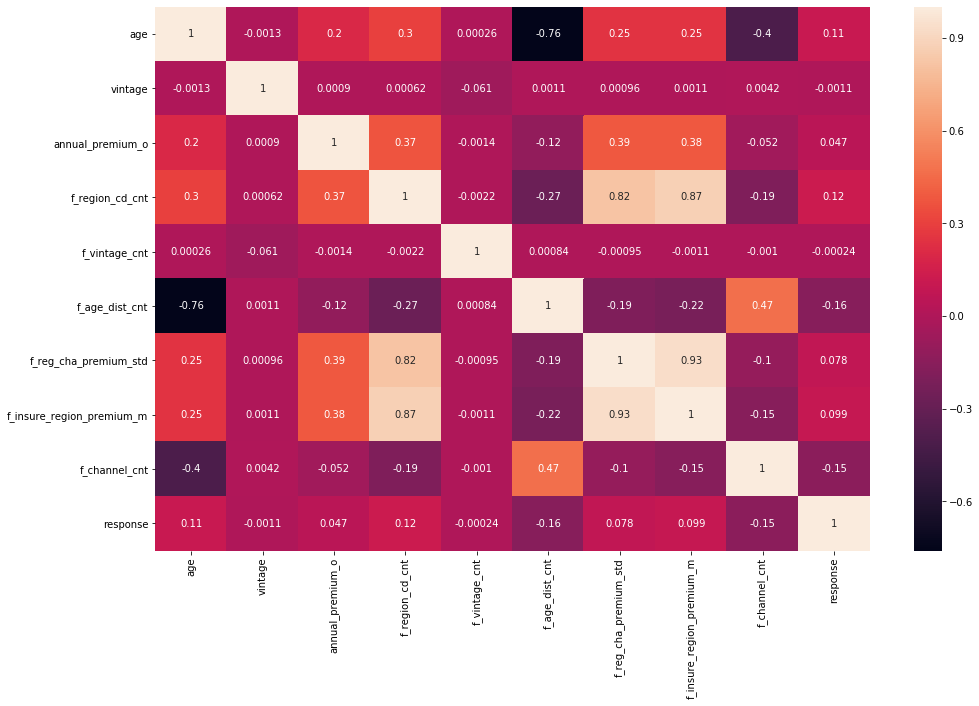

In [9]:
#### heatmap ####
plt.figure(figsize = (16,10))
sns.heatmap(X_train_fs[contineous_vars].corr(), annot=True, )
plt.show()

#### Observations:
    1. f_reg_cha_premium_std feature is highly correlated with f_insure_region_premium_m (93%)
    2. vintage and f_vintage_cnt variables are not correlated with response(target) variable

In [10]:
#### dropping highly correlated columns ####
X_train_fs = X_train_fs.drop(labels = ['vintage', 'f_vintage_cnt', 'f_reg_cha_premium_std', 'f_insure_region_premium_m'], axis = 1)
X_train_fs.shape

(381109, 25)

In [11]:
#### dropping the duplicate or redundant categorical variables ####
X_train_fs = X_train_fs.drop(labels = ['region_cd_rare', 'f_region_premium_m', 'sales_channel_rare', 'f_channel_premium_std', 'f_vehicle_age_premium_std', 'f_age_bins_p'], axis = 1)
X_train_fs.shape

(381109, 19)

In [12]:
#### categorical variables #### 
categorical_vars = ['previously_insured', 'response', 'gender_le', 'vehicle_damage_le', 'f_vehicle_age_p', 'f_policy_channel_p', 'f_age_bins_premium_me',
'f_g_age_bins_premium_std', 'f_v_dam_age_premium_m', 'f_insured_dam_premium_s', 'f_licence_bins_mean', 'f_insure_v_age_dam_premium_m' ]
print("categorical_vars :", len(categorical_vars))

categorical_vars : 12


In [13]:
## Fisher-Score (Chi-Square) # suited for Binary Target  ###
from sklearn.feature_selection import chi2
f_score = chi2(X_train_fs[categorical_vars], X_train_fs['response'])
f_score

(array([2.40338277e+04, 3.34399000e+05, 4.81295296e+02, 2.37000358e+04,
        6.78207599e-01, 5.45395602e+02, 1.70785148e+05, 2.90732713e+06,
        2.24186937e+06, 1.49873177e+05, 4.04141277e+05, 2.30388404e+06]),
 array([0.00000000e+000, 0.00000000e+000, 1.11658267e-106, 0.00000000e+000,
        4.10204615e-001, 1.26369211e-120, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000]))

In [14]:
#### independent and dependent variables ####
X_train = X_train_fs.drop(labels = ['response'], axis = 1)
y_train = X_train_fs['response']
print(X_train.shape)
print(y_train.shape)

(381109, 18)
(381109,)


#### Handling Class Imbalance 

In [ ]:
#### handling class imbalance using SMOTE technique ###
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state= 0, k_neighbors= 5 )
#X_train, y_train = smote.fit_resample(X_train, y_train )
#shape of dataset
#print(X_train.shape)
#print(y_train.shape)

#### Train & Test Dataset

In [15]:
#### creation of train and test dataset ####
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_train_ds, y_train_ds, test_size = 0.2, random_state = 0 )
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0 )
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(304887, 18)
(304887,)
(76222, 18)
(76222,)


#### model parameter optimizing  - fine tuning

In [ ]:
%%time
#### grid search for logistic regression ####
#### identifying hyperparameters of the logistic regression Model #####
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# define models and parameters
logit_r = LogisticRegression(random_state= 0)
solvers = ['liblinear', 'lbfgs']
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)  
# StratifiedKfold
from sklearn.model_selection import StratifiedKFold 
strkfold = StratifiedKFold(n_splits=4, random_state=0, shuffle=True)
# Grid search
grid_search = GridSearchCV(estimator=logit_r, param_grid=grid, n_jobs=-1, cv=strkfold, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_ds, y_train_ds)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#### Logistic Regression Model Build with Optimized Parameters

In [26]:
%%time
#### model implementation with optimized parameters ####
logit_r = LogisticRegression(C= 100, penalty= 'l1', solver= 'liblinear', random_state= 0,class_weight= 'balanced' ) #    
logit_r = logit_r.fit(X_train, y_train)

Wall time: 42min 38s


In [27]:
%%time
#### prediction of train dataset ####
y_predict = logit_r.predict(X_train)

Wall time: 97 ms


In [28]:
#### confusion metrics ####
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, roc_auc_score, auc
cm = confusion_matrix(y_true= y_train, y_pred= y_predict)
print(cm)

[[169178  98350]
 [  2031  35328]]


In [29]:
### Evaluation Metrics validation #####
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_train, y_predict)
f1 = f1_score(y_train, y_predict )
recall = recall_score(y_train, y_predict)
precision = precision_score(y_train, y_predict)
#explained_variance = y_predict.explained_variance()
classification_report = classification_report(y_train, y_predict)
print('Train Dataset Accuracy :',round(accuracy,3))
print('Train Dataset F1 Score :',round(f1,3))
print('Train Dataset Recall :',round(recall,3))
print('Train Dataset Precision :',round(precision,3))
#print("Trained model Explained variance :", explained_variance)
print('Train Dataset Classfication Report:','\n', classification_report)

Train Dataset Accuracy : 0.671
Train Dataset F1 Score : 0.413
Train Dataset Recall : 0.946
Train Dataset Precision : 0.264
Train Dataset Classfication Report: 
               precision    recall  f1-score   support

           0       0.99      0.63      0.77    267528
           1       0.26      0.95      0.41     37359

    accuracy                           0.67    304887
   macro avg       0.63      0.79      0.59    304887
weighted avg       0.90      0.67      0.73    304887



#### AUC-ROC 

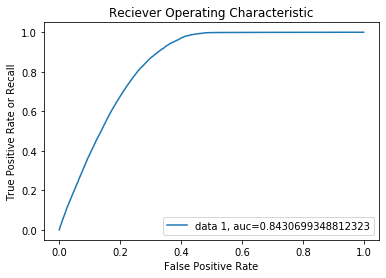

In [30]:
#### Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate(Recall) against the false positive rate ####
#### It shows the tradeoff between sensitivity and specificity ####
y_pred_proba = logit_r.predict_proba(X_train)[::,1]
fpr, tpr, _ = roc_curve(y_train,  y_pred_proba)
auc = roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate or Recall")
plt.title("Reciever Operating Characteristic")
plt.show()

#### Test Dataset Predictions

In [31]:
#### prediction of Test dataset ####
y_test_predict = logit_r.predict(X_test)

In [32]:
#### confusion metrics ####
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, roc_auc_score, auc
cm = confusion_matrix(y_true= y_test, y_pred= y_test_predict)
print(cm)

[[42100 24771]
 [  485  8866]]


In [33]:
### Evaluation Metrics for Test validation #####
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, y_test_predict)
f1 = f1_score(y_test, y_test_predict)
recall = recall_score(y_test, y_test_predict)
precision = precision_score(y_test, y_test_predict)
#explained_variance = y_predict.explained_variance()
classification_report = classification_report(y_test, y_test_predict)
print('Test Dataset Accuracy :',round(accuracy,3))
print('Test Dataset F1 Score :',round(f1,3))
print('Test Dataset Recall :',round(recall,3))
print('Test Dataset Precision :',round(precision,3))
#print("Trained model Explained variance :", explained_variance)
print('Test Dataset Classfication Report:','\n', classification_report)

Test Dataset Accuracy : 0.669
Test Dataset F1 Score : 0.412
Test Dataset Recall : 0.948
Test Dataset Precision : 0.264
Test Dataset Classfication Report: 
               precision    recall  f1-score   support

           0       0.99      0.63      0.77     66871
           1       0.26      0.95      0.41      9351

    accuracy                           0.67     76222
   macro avg       0.63      0.79      0.59     76222
weighted avg       0.90      0.67      0.73     76222



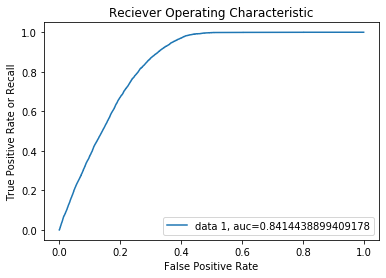

In [34]:
#### Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate(Recall) against the false positive rate ####
#### It shows the tradeoff between sensitivity and specificity ####
y_test_proba = logit_r.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_test_proba)
auc = roc_auc_score(y_test,  y_test_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate or Recall")
plt.title("Reciever Operating Characteristic")
plt.show()        

In [35]:
#### Pickling the Logistic Regression Model ####
joblib.dump(logit_r, "logistic_model.pkl")

['logistic_model.pkl']

### Best Submission ROC_AUC Score - 0.79

## Kindly comment on the approach for improvement of the model & learning!!!